In [6]:
import numpy as np
import pandas as pd

from cvxopt import solvers, matrix
solvers.options['show_progress'] = False

import sys
sys.path.append("../graph_signal_processing")

from graph_generator import line_graph, grid_graph, rbf_random_graph, er_random_graph
from graph_signal_generator import heat_signal_generator
from learn_heat import learn_heat
from metrics import F1_score

import matplotlib.pyplot as plt

# Generating heat diffusion graph signals

Le modèle du signal est:
$$ x = \mathcal{D}h + \epsilon$$
où $h$ est une variable latente, $\mathcal{D}$ est la matrice de représentation. Dans la suite, nous ferons l'hyptohèse que des informations sur la structure du graphe sont contenues dans cette matrice. En particulier, on peut supposer que D est un dictionnaire de motifs spectraux du graph. 

Dans la suite, nous allons nous intéresser aux processes de diffusion sur graphs. La matrice du Laplacien sera utilisée pour modéliser cette diffusion (cf equation de la chaleur). 
$$ D = [exp(-\tau_1 L), exp(-\tau_2), ...]$$

# Learning graphs from heat diffusion signals

In [8]:
true_tau = [1.]
n_samples = 1000 # number of signals simulated for each graph
n_steps = 100 # number of maximum steps in learn_heat
n_trials = 5 # number of trials for each graph and each set of parameters

# hyperparameters for the grid search
alpha_ = np.logspace(-6, 1, 8)
beta_ = np.logspace(-4, 1, 6)
threshold_ = np.logspace(-3, -1, 3)

## Line graph

In [9]:
L = line_graph(16)

In [10]:
list_alpha = []
list_beta = []
list_threshold = []
list_F1 = []

best = 0.
for alpha in alpha_:
    for beta in beta_:
        stats = [0] * len(threshold_)
        for _ in range(n_trials):
            samples, _ = heat_signal_generator(L, true_tau, n_samples)
            pred_L, _, _ = learn_heat(samples, n_step=n_steps, beta=beta, alpha=alpha, s=len(true_tau), log_step=500, true_tau=true_tau)
            for i, threshold in enumerate(threshold_):
                stats[i] += F1_score(L, pred_L)
        for i, threshold in enumerate(threshold_):
            list_alpha.append(alpha)
            list_beta.append(beta)
            list_threshold.append(threshold)
            F1 = stats[i] / n_trials
            list_F1.append(F1)
            if F1 > best:
                best = F1
                print("alpha : {0}; beta : {1}; threshold : {2} --> F1 = {3}".format(alpha, beta, threshold, F1))
results_list = pd.DataFrame({"alpha" : list_alpha, "beta" : list_beta, "threshold" : list_threshold, "F1" : list_F1})
        

alpha : 1e-06; beta : 0.0001; threshold : 0.001 --> F1 = 0.9295985438365861
alpha : 1e-06; beta : 0.001; threshold : 0.001 --> F1 = 0.9378030303030304
alpha : 1e-05; beta : 0.01; threshold : 0.001 --> F1 = 0.9507331378299121
alpha : 0.001; beta : 0.01; threshold : 0.001 --> F1 = 0.9870967741935484
alpha : 0.01; beta : 0.0001; threshold : 0.001 --> F1 = 0.9935483870967742
alpha : 0.01; beta : 0.01; threshold : 0.001 --> F1 = 1.0


In [11]:
results_list.to_csv("learnHeat_line_16_nodes_100_steps_5_trials.csv")

## Grid graph

In [12]:
L = grid_graph(16)

In [13]:
list_alpha = []
list_beta = []
list_threshold = []
list_F1 = []

best = 0.

for alpha in alpha_:
    for beta in beta_:
        stats = [0] * len(threshold_)
        for _ in range(n_trials):
            samples, _ = heat_signal_generator(L, true_tau, n_samples)
            pred_L, _, _ = learn_heat(samples, n_step=n_steps, beta=beta, alpha=alpha, s=len(true_tau), log_step=500, true_tau=true_tau)
            for i, threshold in enumerate(threshold_):
                stats[i] += F1_score(L, pred_L)
        for i, threshold in enumerate(threshold_):
            list_alpha.append(alpha)
            list_beta.append(beta)
            list_threshold.append(threshold)
            F1 = stats[i] / n_trials
            list_F1.append(F1)
            if F1 > best:
                best = F1
                print("alpha : {0}; beta : {1}; threshold : {2} --> F1 = {3}".format(alpha, beta, threshold, F1))
results_grid = pd.DataFrame({"alpha" : list_alpha, "beta" : list_beta, "threshold" : list_threshold, "F1" : list_F1})
results_grid.to_csv("learnHeat_grid_16_nodes_100_steps_5_trials.csv")     

alpha : 1e-06; beta : 0.0001; threshold : 0.001 --> F1 = 0.8806122448979592
alpha : 1e-06; beta : 0.001; threshold : 0.001 --> F1 = 0.9030957310460417
alpha : 1e-06; beta : 0.01; threshold : 0.001 --> F1 = 0.9121135758651286
alpha : 0.0001; beta : 0.01; threshold : 0.001 --> F1 = 0.9304121648659465
alpha : 0.001; beta : 0.01; threshold : 0.001 --> F1 = 0.9472244387116548
alpha : 0.01; beta : 0.0001; threshold : 0.001 --> F1 = 1.0


## RBF graph

In [14]:
L = rbf_random_graph(16)

list_alpha = []
list_beta = []
list_threshold = []
list_F1 = []

best = 0.

for alpha in alpha_:
    for beta in beta_:
        stats = [0] * len(threshold_)
        for _ in range(n_trials):
            samples, _ = heat_signal_generator(L, true_tau, n_samples)
            pred_L, _, _ = learn_heat(samples, n_step=n_steps, beta=beta, alpha=alpha, s=len(true_tau), log_step=500, true_tau=true_tau)
            for i, threshold in enumerate(threshold_):
                stats[i] += F1_score(L, pred_L)
        for i, threshold in enumerate(threshold_):
            list_alpha.append(alpha)
            list_beta.append(beta)
            list_threshold.append(threshold)
            F1 = stats[i] / n_trials
            list_F1.append(F1)
            if F1 > best:
                best = F1
                print("alpha : {0}; beta : {1}; threshold : {2} --> F1 = {3}".format(alpha, beta, threshold, F1))
results_rbf = pd.DataFrame({"alpha" : list_alpha, "beta" : list_beta, "threshold" : list_threshold, "F1" : list_F1})
results_rbf.to_csv("learnHeat_rbf_16_nodes_100_steps_5_trials.csv")     

alpha : 1e-06; beta : 0.0001; threshold : 0.001 --> F1 = 0.6171036179361804
alpha : 1e-06; beta : 0.001; threshold : 0.001 --> F1 = 0.6305751315187023
alpha : 1e-06; beta : 0.01; threshold : 0.001 --> F1 = 0.6650889316718447
alpha : 1e-05; beta : 0.001; threshold : 0.001 --> F1 = 0.6887120479369647
alpha : 0.001; beta : 0.0001; threshold : 0.001 --> F1 = 0.6924967668033847
alpha : 0.01; beta : 0.0001; threshold : 0.001 --> F1 = 0.772091580020954
alpha : 0.01; beta : 0.001; threshold : 0.001 --> F1 = 0.7787347499893202
alpha : 0.01; beta : 0.01; threshold : 0.001 --> F1 = 0.8437521073383099


# Some visualization

## Line

In [30]:
L = line_graph(16)
samples, H = heat_signal_generator(L, true_tau, n_samples)
pred_L, pred_H, _ = learn_heat(samples, n_step=n_steps, beta=1e-2, alpha=1e-2, s=len(true_tau), log_step=500, true_tau=true_tau)

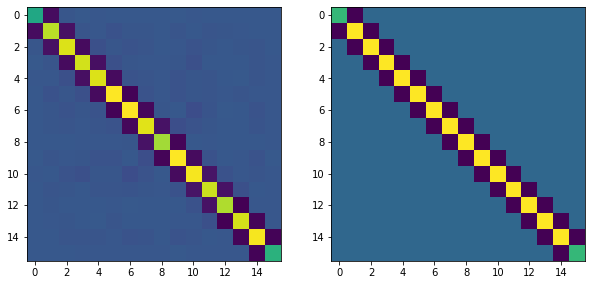

In [33]:
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(pred_L)
plt.subplot(1, 2, 2)
plt.imshow(L)

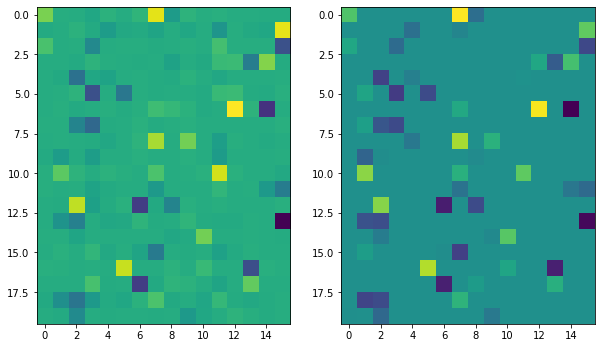

In [41]:
plt.figure(figsize=(10, 100))
plt.subplot(1, 2, 1)
plt.imshow(pred_H[:20, :20])
plt.subplot(1, 2, 2)
plt.imshow(H[:20, :20])

## Grid

In [36]:
L = grid_graph(16)
samples, H = heat_signal_generator(L, true_tau, n_samples)
pred_L, pred_H, _ = learn_heat(samples, n_step=n_steps, beta=1e-4, alpha=1e-2, s=len(true_tau), log_step=500, true_tau=true_tau)

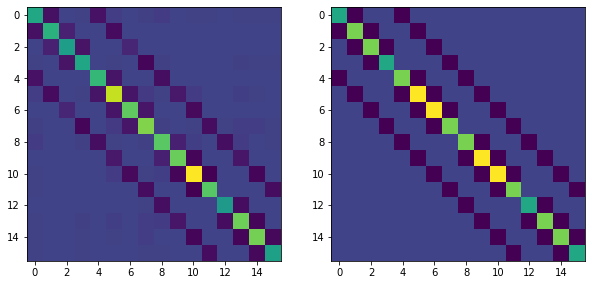

In [37]:
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(pred_L)
plt.subplot(1, 2, 2)
plt.imshow(L)

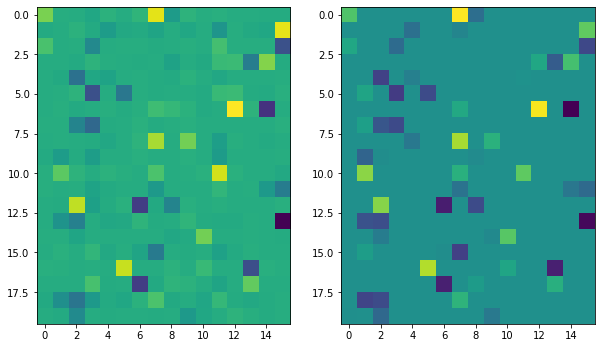

In [40]:
plt.figure(figsize=(10, 100))
plt.subplot(1, 2, 1)
plt.imshow(pred_H[:20, :20])
plt.subplot(1, 2, 2)
plt.imshow(H[:20, :20])

## RBF

In [39]:
L = rbf_random_graph(16)
samples, H = heat_signal_generator(L, true_tau, n_samples)
pred_L, pred_H, _ = learn_heat(samples, n_step=n_steps, beta=1e-4, alpha=1e-2, s=len(true_tau), log_step=500, true_tau=true_tau)

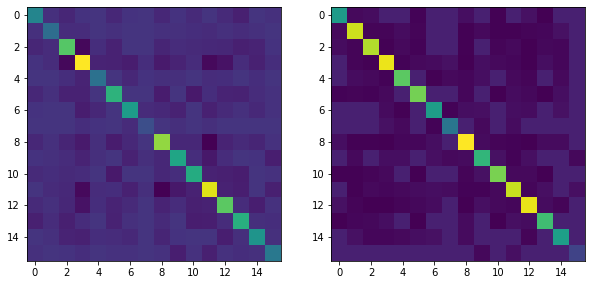

In [42]:
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(pred_L)
plt.subplot(1, 2, 2)
plt.imshow(L)

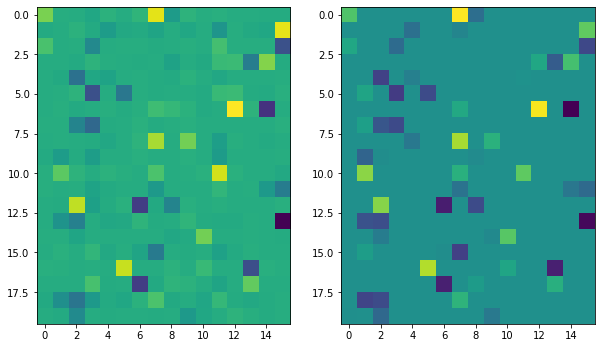

In [44]:
plt.figure(figsize=(10, 200))
plt.subplot(1, 2, 1)
plt.imshow(pred_H[:20, :20])
plt.subplot(1, 2, 2)
plt.imshow(H[:20, :20])